In [1]:
import qutip as qt
from utils import *
import numpy as np
from IPython.display import Math,display
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qutip import ket2dm

In [2]:

# Pauli Operators
sx = 0.5*qt.operators.sigmax()
sy = 0.5*qt.operators.sigmay()
sz = 0.5*qt.operators.sigmaz()
I =  qt.operators.identity(2)

In [3]:
def hamiltonian_ising(N,omega,delta,V):
  sx = 0.5*qt.operators.sigmax()
  #sy = 0.5*qt.operators.sigmay()
  sz = 0.5*qt.operators.sigmaz()
  I = qt.operators.identity(2)

  ising_ham = qt.tensor([I*0]*N)
  for i in range(N):
    hz = qt.tensor([sz if j==i else I for j in range(N)])
    hx = qt.tensor([sx if j==i else I for j in range(N)])
    ising_ham += 1*delta*hz+omega*hx
    for j in range(i + 1, N):
        hzz = qt.tensor([sz if k == i or k == j else I for k in range(N)]) # assume obc
        ising_ham += (V/abs(i-j))*hzz
  
  return(ising_ham)

In [56]:
# Hamiltonian (of boltzmann machines)
omega = 1
N = 5
delta = 0
V =  7*omega
hamiltonian=hamiltonian_ising(N,omega,delta,V)

# jump operators 
sm = qt.operators.sigmam() # spin-lowering operators


# collapse operator
kappa = 1
c_ops = [qt.tensor([sm if i==j  else I for j in range(N)]) for i in range(N)]
c_ops = [np.sqrt(kappa/4) * c_op for c_op in c_ops]

In [57]:
hamiltonian

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[11.22916667  0.5         0.5        ...  0.          0.
   0.        ]
 [ 0.5         3.9375      0.         ...  0.          0.
   0.        ]
 [ 0.5         0.          1.3125     ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.3125      0.
   0.5       ]
 [ 0.          0.          0.         ...  0.          3.9375
   0.5       ]
 [ 0.          0.          0.         ...  0.5         0.5
  11.22916667]]

In [58]:
# Linbladian
L = qt.liouvillian(hamiltonian, c_ops)
L_dag = qt.liouvillian(hamiltonian, c_ops).dag()

In [59]:
# diagonalization using qutip
val,mat = L_dag.eigenstates()
tol = 1e-8
real_vals = np.where(np.abs(val.imag)<tol,val.real,val)
real_vals = np.where(np.abs(real_vals.real)<tol,real_vals.imag,real_vals)
print('eigen values\n', real_vals)

l2indx = np.argsort(abs(real_vals))[1]
l2 = mat[l2indx].full().reshape(2**N,2**N)

eigen values
 [-1.2415934 +0.j         -1.1106136 +7.27821515j -1.1106136 -7.27821515j
 ... -0.13142482-7.27758683j -0.13142482+7.27758683j
  0.        +0.j        ]


In [60]:
#init_state = qt.tensor([(1/np.sqrt(2))*(qt.ket('1')+qt.ket('1'))]*N)
init_state =  qt.rand_ket(2**N)
init_state.dims = [[2]*N,[1]]
init_state

Quantum object: dims = [[2, 2, 2, 2, 2], [1]], shape = (32, 1), type = ket
Qobj data =
[[-0.00170465+0.07550869j]
 [-0.17460337+0.21484629j]
 [ 0.1958695 +0.01418287j]
 [-0.14361771+0.13565332j]
 [-0.00635901+0.18258515j]
 [-0.01779381-0.17798927j]
 [ 0.18178661+0.0267768j ]
 [-0.20326362-0.07094786j]
 [ 0.11765071-0.10859979j]
 [ 0.14534946-0.15178879j]
 [-0.12771055-0.02540109j]
 [ 0.1395059 +0.04214017j]
 [ 0.0813233 -0.05966513j]
 [-0.03712268-0.1887014j ]
 [-0.0507444 +0.17388933j]
 [-0.00362397-0.00743169j]
 [-0.12634404-0.22575581j]
 [ 0.1495397 +0.10463791j]
 [ 0.05233809+0.02719233j]
 [-0.06997026-0.22814811j]
 [-0.1066348 +0.11037121j]
 [-0.01593688+0.22635615j]
 [-0.09339168-0.08873009j]
 [ 0.0570661 +0.04777061j]
 [-0.20129877+0.14755729j]
 [-0.21482843+0.05725542j]
 [ 0.00310848+0.15844167j]
 [-0.07142633+0.22686939j]
 [-0.03527929+0.03914037j]
 [ 0.03713936-0.08011883j]
 [ 0.08105001+0.13909981j]
 [ 0.12308728-0.06031687j]]

In [61]:
rho_0 = ket2dm(init_state)
rho_0

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[ 0.00570447+0.j          0.0165204 -0.01281783j  0.00073704+0.01481403j
  ... -0.00611298+0.00266777j  0.01036508+0.0063571j
  -0.00476427+0.00919134j]
 [ 0.0165204 +0.01281783j  0.07664526+0.j         -0.03115234+0.04455821j
  ... -0.02369789-0.00600976j  0.01573347+0.04170059j
  -0.03445031+0.01591332j]
 [ 0.00073704-0.01481403j -0.03115234-0.04455821j  0.03856601+0.j
  ...  0.00613815+0.01621958j  0.01784806-0.02609589j
   0.02325358+0.01355997j]
 ...
 [-0.00611298-0.00266777j -0.02369789+0.00600976j  0.00613815-0.01621958j
  ...  0.00779836+0.j         -0.00813437-0.01165971j
   0.0094039 -0.00762148j]
 [ 0.01036508-0.0063571j   0.01573347-0.04170059j  0.01784806+0.02609589j
  ... -0.00813437+0.01165971j  0.02591786+0.j
   0.00158616+0.0220101j ]
 [-0.00476427-0.00919134j -0.03445031-0.01591332j  0.02325358-0.01355997j
  ...  0.0094039 +0.00762148j  0.00158616-0.022

In [62]:
l2mat = qt.Qobj(l2)
l2mat.dims = rho_0.dims

In [63]:
temp = l2mat*rho_0
abs(temp.tr())

0.17611306239421678

In [80]:
def Us(theta_phi):
    phi,theta = theta_phi
    u = ((-1j/2)*phi*sz).expm()*((-1j/2)*theta*sy).expm()
    U = qt.tensor([u]*N)
    return U


def chi(theta_phi):
    # theta,phi = theta_phi
    # u = ((1j/2)*phi*sz).expm()*((1j/2)*theta*sy).expm()
    # Us = qt.tensor([u]*N)
    U = Us(theta_phi=theta_phi)
    Udag = U.dag()
    # l2mat.dims = [[2]*N,[2]*N]
    # rho_0.dims = [[2]*N,[2]*N]
    c = abs((l2mat*U*rho_0*Udag).tr())
    return c

epsilon = 1e-4

def cost(theta_phi):
    c = chi(theta_phi)
    return c-epsilon

In [81]:
# Initial guess for theta and phi
initial_guess = [np.random.uniform(0, 2*np.pi-0.001),np.random.uniform(0, np.pi)]  # Example values

bounds = [(0, np.pi), (0, 2 * np.pi-0.001)] 

# Define constraints for scipy.optimize
constraints = {'type': 'ineq', 'fun': cost}

In [82]:
# Perform optimization
result = minimize(
    chi,                 # Objective function
    initial_guess,       # Initial guess
    constraints=constraints,  # Constraints
    bounds=bounds,
    method='SLSQP',
    options={'disp': True},
    tol = 1e-16
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17564657031846256
            Iterations: 20
            Function evaluations: 68
            Gradient evaluations: 20


In [106]:
def u(phi,theta):
    u = ((1j/2)*phi*sz).expm()*((1j/2)*theta*sy).expm()
    return(u)

def Us(params):
    phi,theta = params[:N], params[N:]
    gates = []
    for i in range(N):
        gates.append(u(phi[i],theta[i]))
    U = qt.tensor(gates)
    return U


def chi(params):
    U = Us(params)
    Udag = U.dag()
    c = abs((l2mat*U*rho_0*Udag).tr())
    return c

epsilon = 1e-4
def cost(params):
    c = chi(params)
    return c-epsilon

In [107]:
initial_guess = np.concatenate([np.random.uniform(0, 2*np.pi-0.001,5),np.random.uniform(0, np.pi,5)])

bounds = [(0, 2 * np.pi - 0.001)] * 5 +  [(0, np.pi)] * 5 

# Perform optimization
result = minimize(
    chi,                 # Objective function
    initial_guess,       # Initial  # Constraints
    bounds=bounds,
    method='SLSQP',
    options={'disp': True},
    tol = 1e-16
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13488505027651274
            Iterations: 77
            Function evaluations: 858
            Gradient evaluations: 77


In [109]:
def u(phi,theta,lamda):
    u = ((1j/2)*phi*sz).expm()*((1j/2)*theta*sy).expm()*((1j/2)*lamda*sz).expm()
    return(u)

def Us(params):
    phi,theta,lamda = params[:N], params[N:2*N],params[2*N:3*N]
    gates = []
    for i in range(N):
        gates.append(u(phi[i],theta[i],lamda[i]))
    U = qt.tensor(gates)
    return U


def chi(params):
    U = Us(params)
    Udag = U.dag()
    c = abs((l2mat*U*rho_0*Udag).tr())
    return c

epsilon = 1e-4
def cost(params):
    c = chi(params)
    return c-epsilon

In [114]:
initial_guess = np.concatenate([np.random.uniform(0, np.pi,5), np.random.uniform(0, 2*np.pi-0.001,5),np.random.uniform(0, np.pi,5)])

bounds = [(0, np.pi)] * 5 + [(0, 2 * np.pi - 0.001)] * 5 + [(0, 2*np.pi)] * 5

# Perform optimization
result = minimize(
    chi,                 # Objective function
    initial_guess,       # Initial  # Constraints
    bounds=bounds,
    method='SLSQP',
    options={'disp': True},
    tol = 1e-16
)

Iteration limit reached    (Exit mode 9)
            Current function value: 0.10814527564636446
            Iterations: 100
            Function evaluations: 1600
            Gradient evaluations: 100


In [115]:
result.x

array([3.14159265e+00, 3.14159265e+00, 2.78868374e+00, 2.63767890e+00,
       2.27574406e+00, 2.11164689e-16, 3.02476577e+00, 6.28218531e+00,
       4.11264384e+00, 6.66270935e-02, 3.42279189e+00, 1.85535283e+00,
       2.81239233e-16, 5.79794899e+00, 6.55842038e-01])

In [116]:
result.fun

0.10814527564636446

In [117]:
rotation_unitary = Us(result.x)

In [118]:
mpe_state = rotation_unitary*init_state
mpe_state

Quantum object: dims = [[2, 2, 2, 2, 2], [1]], shape = (32, 1), type = ket
Qobj data =
[[-0.13136818-0.12964826j]
 [-0.00546003-0.05342071j]
 [-0.15833699+0.02190751j]
 [-0.06082396-0.27087273j]
 [ 0.11441265-0.02085684j]
 [-0.03721979-0.03750477j]
 [-0.01436498-0.00830301j]
 [ 0.06939679-0.13169547j]
 [-0.15534485-0.07927105j]
 [ 0.14857333+0.07218666j]
 [ 0.02348779-0.13170467j]
 [ 0.06570489+0.07796034j]
 [ 0.19260122-0.02959978j]
 [-0.11393216+0.10103464j]
 [ 0.1879433 -0.0178702j ]
 [ 0.34425297-0.11763033j]
 [ 0.08319545-0.09566994j]
 [-0.08284709-0.08963492j]
 [ 0.06857035+0.05182049j]
 [ 0.02279718-0.06912306j]
 [-0.11254716+0.11739039j]
 [ 0.05230909-0.12341253j]
 [-0.0505086 +0.0490954j ]
 [ 0.18621778+0.02807422j]
 [ 0.11894057-0.09269299j]
 [-0.01959583+0.00366911j]
 [-0.13787587-0.06032267j]
 [ 0.23901489+0.07669786j]
 [ 0.01920765-0.1169504j ]
 [ 0.27073728-0.07258909j]
 [ 0.33381854+0.04990364j]
 [ 0.20463401-0.14430921j]]

In [119]:
temp = l2mat*rotation_unitary*rho_0*rotation_unitary.dag()
abs(temp.tr())

0.10814527564636446

In [122]:
# solving master equation
final_state = qt.steadystate(hamiltonian,c_ops) # steady state solution 

tlist = np.linspace(0, 50,1000)
medata = qt.mesolve(hamiltonian, init_state, tlist, c_ops, []) # initial state  = |0>
qmpedata = qt.mesolve(hamiltonian, mpe_state, tlist, c_ops, []) # Mpemba unitary rotated state

c:\Users\navan\anaconda3\envs\qc\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\navan\anaconda3\envs\qc\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


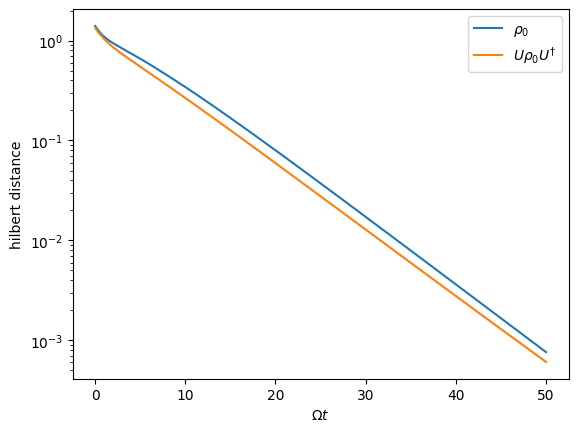

In [123]:
# calculation of Hilbert Distances

hilbert_distance = []
qmpe_dist = []

#hs_max = np.sqrt(2 *(1-1/(2**N)))

for state in medata.states:

  dis = (np.trace((state-final_state)**2))**(1/2)
  #dis=qt.hilbert_dist(state,final_state)
  hilbert_distance.append(dis)

for state in qmpedata.states:
  #dis = qt.hilbert_dist(state,final_state)
  dis = (np.trace((state-final_state)**2))**(1/2)
  qmpe_dist.append(dis)

plt.yscale('log')
plt.plot(tlist,hilbert_distance,label=r'$\rho_0$')
plt.plot(tlist,qmpe_dist,label=r'$U\rho_0U^{\dagger}$')
plt.xlabel(f'$\Omega t$')
plt.ylabel('hilbert distance')
plt.legend()
plt.show()